In [1]:
import pandas as pd

In [2]:
filename = "creditcard.csv"
df = pd.read_csv(filename)

In [3]:
X, y = df[df.columns[df.columns != "Class"]], df["Class"]

In [4]:
# Reproducibility settings
import numpy as np
from sklearn.utils import check_random_state

SEED = 12345

# The NumPy Generator will be used throughout the whole experiment
# rng = np.random.default_rng(SEED)
np.random.seed(SEED)
rng = check_random_state(SEED)

In [5]:
# Model Selection and Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

# Model Persistence
from joblib import load

# Visualisation
from matplotlib import pyplot as plt


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, 
                                                    random_state=rng)

In [7]:
import os
from pathlib import Path

MODEL_FOLDER = Path(os.path.abspath(os.path.curdir)) / "MODELS"

In [8]:
# Gather all the model persistence files (.joblib) and sort them alphabetically
model_files_names = sorted(filter(lambda f: f.endswith(".joblib"), os.listdir(MODEL_FOLDER)))

NEAR_MISS_KEY = "under_sampling_near_miss"
SMOTE_KEY = "over_sampling_smote"

model_files_per_sampler = {
    NEAR_MISS_KEY: [],
    SMOTE_KEY: [],
    }

for model_file_name in model_files_names:
    if NEAR_MISS_KEY in model_file_name:
        model_files_per_sampler[NEAR_MISS_KEY].append(MODEL_FOLDER / model_file_name)
    elif SMOTE_KEY in model_file_name:
        model_files_per_sampler[SMOTE_KEY].append(MODEL_FOLDER / model_file_name)
    else:
        continue  # discard the file

In [9]:

def extract_name_string(model_file_path):
    filename, _  = os.path.splitext(os.path.basename(model_file_path))
    filename = filename.replace("gs_", "")
    return " ".join([s.title() for s in filename.split("_")])

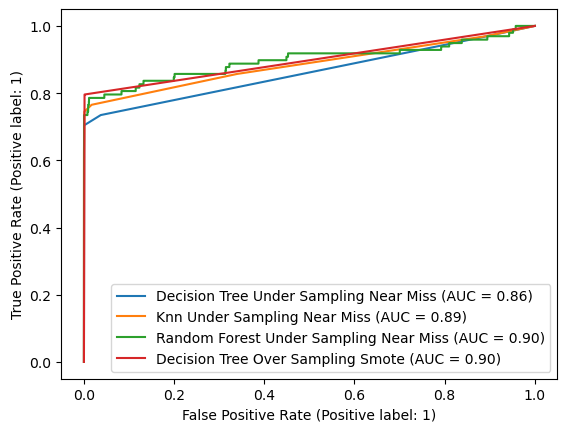

In [10]:
figure = plt.figure()
for sampler in model_files_per_sampler:
    for model_file in model_files_per_sampler[sampler]:
        gs_model = load(model_file)
        name_string = extract_name_string(model_file)
        RocCurveDisplay.from_estimator(gs_model, X_test, y_test,
                                       ax=plt.gca(), name=name_string)
plt.show()